# Project 3 - Web APIs & Classification

## Table of Contents

### 1) Problem Statement
### 2) Data Gathering
### 3) Data Cleaning
### 4) EDA
### 5) Feature Engineering

Objective:<br> 
1) Use Reddit's API to collect posts from two subreddits.<br>
2) Use NLP to train a classifier on which subreddit a given post came from.

## Problem Statement

**To classify Reddit posts from r/nosleep and r/thetruthishere using Natural Language Processing (NLP) and Classification Modeling. The model evaluated and selected based on Accuracy score is expected to predict to which subreddit a given post belongs to.**<br>

**The model should then help Reddit data science team to advise their advertisers on targeted marketing campaigns & spending forecast of products and services like online gaming targeting members of r/nosleep, calming supplements, therapy and counseling services for members of r/thetruthishere depending on the predicted subreddit.**<br>

In [278]:
# installations - for first time
!pip install wordcloud

# imports
import requests
import time
import pandas as pd
import regex as re
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## Gather data

    1) Extract posts from the 2 subreddits that records paranormal stories - NoSleep (fictional stories) and
    TheTruthishere (true experiences)
    2) Attempt to extract 40 pages of posts equivalent to approx. 1000 unique posts per subreddit. 
    3) Write them to individual .csv files for recording purposes.
    4) Read these .csv files to separate dataframes and examine data extracted.

In [3]:
# defining headers for request.get
headers = {'User-agent': 'Akhila'}

In [4]:
# loading the first subreddit - Thetruthishere for 40 pages to get close to 2000 posts
posts = []
after = None
url_truth = 'https://www.reddit.com/r/Thetruthishere.json'
for a in range(40):
    if after == None:
        current_url = url_truth
    else:
        current_url = url_truth + '?after=' + after
    print(a)
    print(current_url)
    res = requests.get(current_url, headers={'User-agent': 'ARJ'})
    
    if res.status_code != 200:
        print('Status error', res.status_code)
        break
    
    current_dict = res.json()
    current_posts = [p['data'] for p in current_dict['data']['children']]
    posts.extend(current_posts)
    after = current_dict['data']['after']
    
    if a > 0:
        prev_posts = pd.read_csv('../data/truthishere.csv')
        current_df = pd.DataFrame()
        
    else:
        pd.DataFrame(posts).to_csv('../data/truthishere.csv', index = False)

    # generate a random sleep duration to look more 'natural'
    sleep_duration = random.randint(2,6)
    time.sleep(sleep_duration)

0
https://www.reddit.com/r/Thetruthishere.json
1
https://www.reddit.com/r/Thetruthishere.json?after=t3_ff98u3
2
https://www.reddit.com/r/Thetruthishere.json?after=t3_fdi9im
3
https://www.reddit.com/r/Thetruthishere.json?after=t3_fbyirb
4
https://www.reddit.com/r/Thetruthishere.json?after=t3_fb4bam
5
https://www.reddit.com/r/Thetruthishere.json?after=t3_f9vcdn
6
https://www.reddit.com/r/Thetruthishere.json?after=t3_f8nvy3
7
https://www.reddit.com/r/Thetruthishere.json?after=t3_f7bik1
8
https://www.reddit.com/r/Thetruthishere.json?after=t3_f6gw9g
9
https://www.reddit.com/r/Thetruthishere.json?after=t3_f4vurd
10
https://www.reddit.com/r/Thetruthishere.json?after=t3_f2mkf5
11
https://www.reddit.com/r/Thetruthishere.json?after=t3_f0o2bm
12
https://www.reddit.com/r/Thetruthishere.json?after=t3_ezh3s3
13
https://www.reddit.com/r/Thetruthishere.json?after=t3_ex9h88
14
https://www.reddit.com/r/Thetruthishere.json?after=t3_eubfsx
15
https://www.reddit.com/r/Thetruthishere.json?after=t3_et4o6d
16

In [5]:
# check for unique posts for 1st subreddit : Thetruthishere
len(set([p['selftext'] for p in posts]))

934

In [9]:
# loading the first subreddit - nosleep for 40 pages to get close to 2000 posts
posts2 = []
after = None
url_false = 'https://www.reddit.com/r/nosleep.json'
for a in range(40):
    if after == None:
        current_url = url_false
    else:
        current_url = url_false + '?after=' + after
    print(a)
    print(current_url)
    res = requests.get(current_url, headers={'User-agent': 'ARJ'})
    
    if res.status_code != 200:
        print('Status error', res.status_code)
        break
    
    current_dict = res.json()
    current_posts = [p['data'] for p in current_dict['data']['children']]
    posts2.extend(current_posts)
    after = current_dict['data']['after']
    
    if a > 0:
        prev_posts = pd.read_csv('../data/nosleep.csv')
        current_df = pd.DataFrame()
        
    else:
        pd.DataFrame(posts2).to_csv('../data/nosleep.csv', index = False)

    # generate a random sleep duration to look more 'natural'
    sleep_duration = random.randint(2,6)
    time.sleep(sleep_duration)

0
https://www.reddit.com/r/nosleep.json
1
https://www.reddit.com/r/nosleep.json?after=t3_fgf3gt
2
https://www.reddit.com/r/nosleep.json?after=t3_ffzq5f
3
https://www.reddit.com/r/nosleep.json?after=t3_fg0jvh
4
https://www.reddit.com/r/nosleep.json?after=t3_ffstij
5
https://www.reddit.com/r/nosleep.json?after=t3_ffh13z
6
https://www.reddit.com/r/nosleep.json?after=t3_ffaotn
7
https://www.reddit.com/r/nosleep.json?after=t3_ff10wd
8
https://www.reddit.com/r/nosleep.json?after=t3_feja1k
9
https://www.reddit.com/r/nosleep.json?after=t3_feolwu
10
https://www.reddit.com/r/nosleep.json?after=t3_fe9hq2
11
https://www.reddit.com/r/nosleep.json?after=t3_fe3lr2
12
https://www.reddit.com/r/nosleep.json?after=t3_fdq3gw
13
https://www.reddit.com/r/nosleep.json?after=t3_fd7fpd
14
https://www.reddit.com/r/nosleep.json?after=t3_fdka47
15
https://www.reddit.com/r/nosleep.json?after=t3_fd558h
16
https://www.reddit.com/r/nosleep.json?after=t3_fd0xsy
17
https://www.reddit.com/r/nosleep.json?after=t3_fcu98m


In [14]:
# check for unique posts for 1st subreddit : Thetruthishere
len(set([p['title'] for p in posts2]))

797

In [15]:
# to write all contents of posts to the csv file
pd.DataFrame(posts).to_csv('../data/truthishere.csv', index = False)

In [16]:
# to write all contents of posts 2 to the csv file
pd.DataFrame(posts2).to_csv('../data/nosleep.csv', index = False)

In [5]:
# creating dfs from posts
nosleep_df = pd.read_csv('../data/truthishere.csv')
truth_df = pd.read_csv('../data/nosleep.csv')

# checking their shapes
nosleep_df.shape

(998, 102)

In [6]:
truth_df.shape

(1000, 100)

In [7]:
# checking for nulls in posts in both dfs
nosleep_df.selftext.isnull().sum()
truth_df.selftext.isnull().sum()

4

In [8]:
truth_df.subreddit.value_counts()

nosleep    1000
Name: subreddit, dtype: int64

In [9]:
truth_df.columns

Index(['approved_at_utc', 'subreddit', 'selftext', 'author_fullname', 'saved',
       'mod_reason_title', 'gilded', 'clicked', 'title', 'link_flair_richtext',
       'subreddit_name_prefixed', 'hidden', 'pwls', 'link_flair_css_class',
       'downs', 'hide_score', 'name', 'quarantine', 'link_flair_text_color',
       'author_flair_background_color', 'subreddit_type', 'ups',
       'total_awards_received', 'media_embed', 'author_flair_template_id',
       'is_original_content', 'user_reports', 'secure_media',
       'is_reddit_media_domain', 'is_meta', 'category', 'secure_media_embed',
       'link_flair_text', 'can_mod_post', 'score', 'approved_by',
       'author_premium', 'thumbnail', 'edited', 'author_flair_css_class',
       'author_flair_richtext', 'gildings', 'content_categories', 'is_self',
       'mod_note', 'created', 'link_flair_type', 'wls', 'removed_by_category',
       'banned_by', 'author_flair_type', 'domain', 'allow_live_comments',
       'selftext_html', 'likes', 'sugg

## Data Cleaning

    1) Remove unnecessary columns
    2) Remove rows here selftext/ post information is Nan. Seen that these are usually posts from moderators
    3) Remove rows with whitelist status is promo_adult_nsfw
    4) After cleaning the rows of invalid/ unnecessary rows, combine/concat the cleaned dataframes from both subreddits into 1
    5) After combining, columns selftext and title are passed to text_processor function that does the following:
         - removes HTML tags using Beautiful Soup
         - extracts words with letters and replaces punctuations and special characters with blank space
         - convert all characters to lower case
         - lammetize the extracted words
         - removes english stop words and extracts meaningful words from the above list of words

In [10]:
# removing unnecessary columns
nosleep_df = nosleep_df[['subreddit','selftext','author_fullname','title','name','author','num_comments',
                         'whitelist_status']]
truth_df = truth_df[['subreddit','selftext','author_fullname','title','name','author','num_comments',
                         'whitelist_status']]

In [11]:
# removing rows where selftext is nan
nosleep_df = nosleep_df[nosleep_df['selftext'].notna()]
truth_df= truth_df[truth_df['selftext'].notna()]

In [12]:
# retrive rows with NSFW values from both datasets -- 42 rows from nosleep and 2 rows from truthishere
nosleep_df[nosleep_df.whitelist_status == 'promo_adult_nsfw']
truth_df[truth_df.whitelist_status == 'promo_adult_nsfw']
# remove rows with NSFW values from both datasets -- 42 rows from nosleep and 2 rows from truthishere
truth_df = truth_df[truth_df.whitelist_status != 'promo_adult_nsfw']
nosleep_df = nosleep_df[nosleep_df.whitelist_status != 'promo_adult_nsfw']

In [13]:
truth_df[truth_df.selftext == '']

,subreddit,selftext,author_fullname,title,name,author,num_comments,whitelist_status


In [14]:
# re-checking df based on the manipulations above
print(nosleep_df.shape)
print(truth_df.shape)

nosleep_df.tail()

(932, 8)
(950, 8)


,subreddit,selftext,author_fullname,title,name,author,num_comments,whitelist_status
993,Thetruthishere,I've been doing this since i can remember. Any...,t2_vgelj8w,I shake like i'm cold randomly .. and half the...,t3_dt1egu,Redthatcat,7,all_ads
994,Thetruthishere,"I work at a home for youths, and one of the re...",t2_61zn4,"If some people are spiritually sensitive, are ...",t3_dsra2m,Kombaticus,18,all_ads
995,Thetruthishere,They are hidden just now. They watch from the ...,t2_4m5n8q0p,Them,t3_dt2n7g,tnerrucetad2101,3,all_ads
996,Thetruthishere,This happened a couple of years ago when I liv...,t2_14386b,Something ran down our hallway,t3_dsmmvk,rcard27,6,all_ads
997,Thetruthishere,Been a long time lurker on this sub and many o...,t2_4o42cqqd,I saw the goatman when I was 9 years old,t3_d9kqnk,outpost-31-82,42,all_ads


In [200]:
truth_df.describe()

,num_comments
count,950.000000
mean,8.780000
std,23.109968
min,0.000000
25%,1.000000
50%,2.000000
75%,7.000000
max,231.000000


In [15]:
# combining the dataframes
combined = pd.concat([truth_df,nosleep_df])

In [16]:
# checking the sequence of concat. The combined df starts with nosleep subreddit
combined.head()

,subreddit,selftext,author_fullname,title,name,author,num_comments,whitelist_status
2,nosleep,"I live in the Philippines, and it was half pas...",t2_5w7fs5ns,"It's been 4 hours since the school's lockdown,...",t3_fgar9h,KatsukiBakugou2k,34,all_ads
3,nosleep,Link for part 1: https://redd.it/fflyqp\n\n\nH...,t2_4wglcouj,I started a new job as a overnight security gu...,t3_fg58z1,Mr_Mojo_Risin95,63,all_ads
4,nosleep,I used to work as a security guard at the mall...,t2_3pdh0fhd,Don’t look at a mall’s overnight security cameras,t3_fg6uxz,Champion_of_Bear,36,all_ads
5,nosleep,My parents told me growing up that I’m a pure ...,t2_3u1z9g99,The biggest regret of my life is taking the An...,t3_ffvodz,spookyChorror,213,all_ads
6,nosleep,She lived about two houses to our left. Her na...,t2_2n6an3ta,The neighbor who was obsessed with my dog,t3_fgcb3g,sawahhhhh,7,all_ads


In [17]:
# checking the sequence of concat. The combined df ends off with nosleep thetruthishere
combined.tail()

,subreddit,selftext,author_fullname,title,name,author,num_comments,whitelist_status
993,Thetruthishere,I've been doing this since i can remember. Any...,t2_vgelj8w,I shake like i'm cold randomly .. and half the...,t3_dt1egu,Redthatcat,7,all_ads
994,Thetruthishere,"I work at a home for youths, and one of the re...",t2_61zn4,"If some people are spiritually sensitive, are ...",t3_dsra2m,Kombaticus,18,all_ads
995,Thetruthishere,They are hidden just now. They watch from the ...,t2_4m5n8q0p,Them,t3_dt2n7g,tnerrucetad2101,3,all_ads
996,Thetruthishere,This happened a couple of years ago when I liv...,t2_14386b,Something ran down our hallway,t3_dsmmvk,rcard27,6,all_ads
997,Thetruthishere,Been a long time lurker on this sub and many o...,t2_4o42cqqd,I saw the goatman when I was 9 years old,t3_d9kqnk,outpost-31-82,42,all_ads


In [18]:
# ensuring the split of posts between the 2 subreddits are maintained post cleaning and combining
combined.subreddit.value_counts()

nosleep           950
Thetruthishere    932
Name: subreddit, dtype: int64

In [306]:
# Function to convert a raw string of text to a string of words
# The input is a single string (a raw unprocessed text), and 
# the output is a single string (a preprocessed text)
def text_processer(raw_text):
    lemm = WordNetLemmatizer()
    
    # 1. Remove HTML.
    review_text = BeautifulSoup(raw_text).get_text()
    
    # 2. Remove non-letters.
    letters_only = re.sub("[^a-zA-Z]", " ", raw_text)
    
    # 3. Convert to lower case, split into individual words.
    words = letters_only.lower().split()
    
    # 4. Lemmatize words.
    lemmed_words = [lemm.lemmatize(i) for i in words]
    
    # 5. In Python, searching a set is much faster than searching
    # a list, so convert the stop words to a set.
    stops = set(stopwords.words('english'))
    stops.update(['wa','ha','ak','le','http','https','wwww','youtube','youtu'])
    
    # 6. Remove stop words.
    meaningful_words = [w for w in lemmed_words if not w in stops]
    
    # 7. Join the words back into one string separated by space, 
    # and return the result.
    return(" ".join(meaningful_words))
    print(stops)

In [70]:
# creating new columns to store the cleaned text. New column body for selftext and heading for title.
combined['body'] = combined['selftext'].map(text_processer)
combined['heading'] = combined['title'].map(text_processer)

In [71]:
# ensuring the new columns are in 
combined.tail()

,subreddit,selftext,author_fullname,title,name,author,num_comments,whitelist_status,body,heading,target,feature_var
993,Thetruthishere,I've been doing this since i can remember. Any...,t2_vgelj8w,I shake like i'm cold randomly .. and half the...,t3_dt1egu,Redthatcat,7,all_ads,since remember anyone got reason,shake like cold randomly half time bad follows,1,shake like cold randomly half time bad follows...
994,Thetruthishere,"I work at a home for youths, and one of the re...",t2_61zn4,"If some people are spiritually sensitive, are ...",t3_dsra2m,Kombaticus,18,all_ads,work home youth one resident classic paranorma...,people spiritually sensitive others anti sensi...,1,people spiritually sensitive others anti sensi...
995,Thetruthishere,They are hidden just now. They watch from the ...,t2_4m5n8q0p,Them,t3_dt2n7g,tnerrucetad2101,3,all_ads,hidden watch woodline yet come close losing,,1,hidden watch woodline yet come close losing
996,Thetruthishere,This happened a couple of years ago when I liv...,t2_14386b,Something ran down our hallway,t3_dsmmvk,rcard27,6,all_ads,happened couple year ago lived parent recently...,something ran hallway,1,something ran hallway happened couple year ago...
997,Thetruthishere,Been a long time lurker on this sub and many o...,t2_4o42cqqd,I saw the goatman when I was 9 years old,t3_d9kqnk,outpost-31-82,42,all_ads,long time lurker sub many paranormal supernatu...,saw goatman year old,1,saw goatman wa year old long time lurker sub m...


## EDA

    1) The subreddits vary hugely in terms of the number of members. r/nosleep has way more followers with 
       13.8m memebers than r/thetruthishere with 251k members.
    2) Looking at absolute number of unique posts per subreddit, nosleep scores slightly better than truthishere 
        but fairly comparable between subreddits. 
    3) It is interesting to note that the number of comments per posts is significantly higher for 
        thetruthishere subreddit, probably because these are true horror experiences and people are interested 
        to know more about them. 
    4) Another interesting fact is that the average length per post is way higher for nosleep subreddit compared 
        to thetruthishere subreddit which is ironic as you expect to see elaborate posts when it is a 
        true experience. 
    5) There are quite a number of words that are commonly seen in both subreddits. not surprising as both 
        subreddits deals with paranormal stories and experiences. Words like 'one', 'time' and 'back' are some 
        of them.
    6) It also appears that different words with similar meanings are common between the subreddits like looked 
        and see, said and told are some of them.

#### Number of unique posts per subreddit

In [72]:
combined.groupby(by = 'subreddit')['title'].count()

subreddit
Thetruthishere    932
nosleep           950
Name: title, dtype: int64

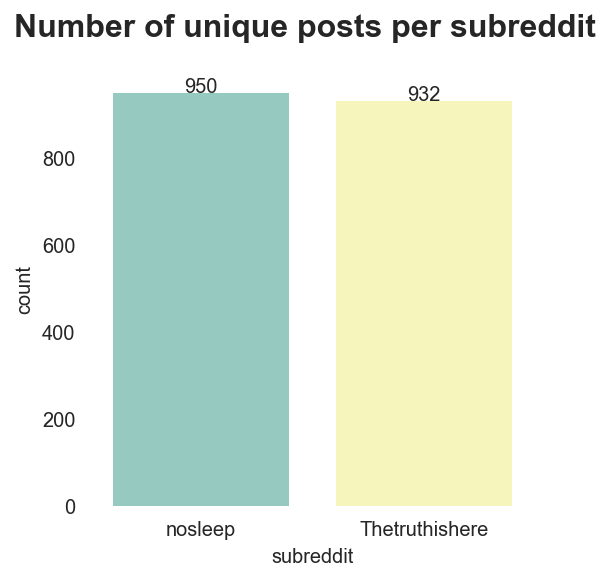

In [279]:
# plotting number of posts per subreddit. 
fig_dims = (4, 4)
fig, ax = plt.subplots(figsize=fig_dims)
fig.suptitle('Number of unique posts per subreddit', fontsize = 16, weight = 'bold')

sns.despine(bottom = True, left = True) # to hide border
graph = sns.countplot(x= combined['subreddit'], data= combined, palette="Set3")

# to display the count per subreddit on top of the bars
i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,
        combined['subreddit'].value_counts()[i],ha="center")
    i += 1

#### Number of comments per subreddit

In [201]:
combined.groupby('subreddit')['num_comments'].sum()

subreddit
Thetruthishere    23716
nosleep            8341
Name: num_comments, dtype: int64

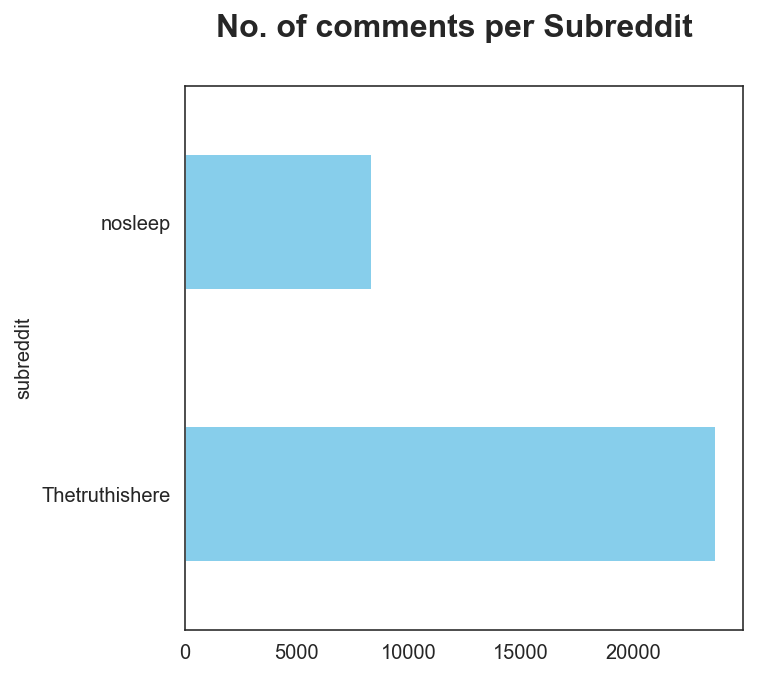

In [280]:
# plotting number of comments per subreddit
fig, ax = plt.subplots(figsize=(5,5))
combined.groupby('subreddit')['num_comments'].sum().plot(kind = 'barh', color = 'skyblue');
fig.suptitle('No. of comments per Subreddit', fontsize = 16, weight = 'bold');

#### Average length of post per subreddit

In [281]:
combined['post_len'] = combined['selftext'].apply(len)
combined.groupby('subreddit')['post_len'].mean()

subreddit
Thetruthishere     1932.571888
nosleep           10958.001053
Name: post_len, dtype: float64

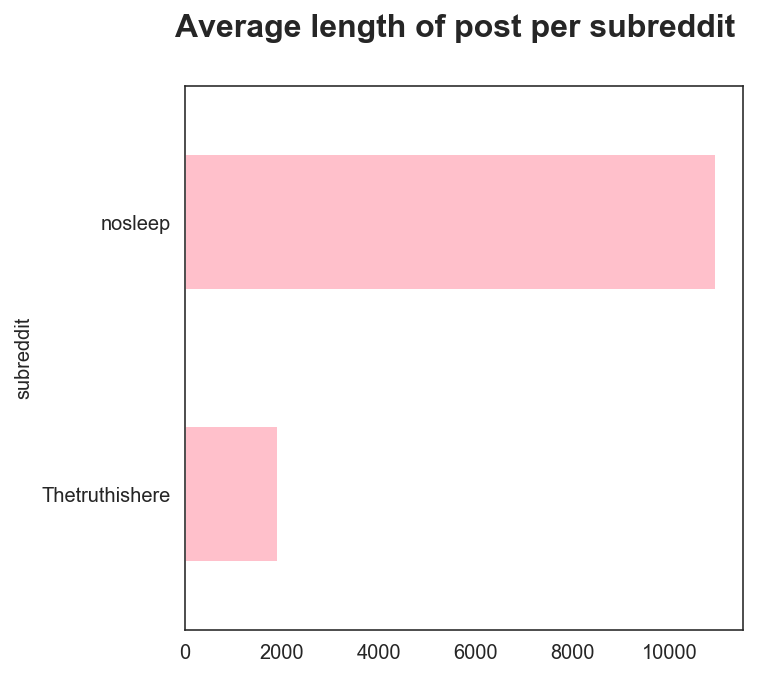

In [282]:
# plotting Average length of post per subreddit
fig, ax = plt.subplots(figsize=(5,5))
combined.groupby('subreddit')['post_len'].mean().plot(kind = 'barh', color = 'pink');
fig.suptitle('Average length of post per subreddit', fontsize = 16, weight = 'bold');

#### Distribution of numberic variables - Length of posts & Number of comments per post and their distribution per Subreddit (target variable)

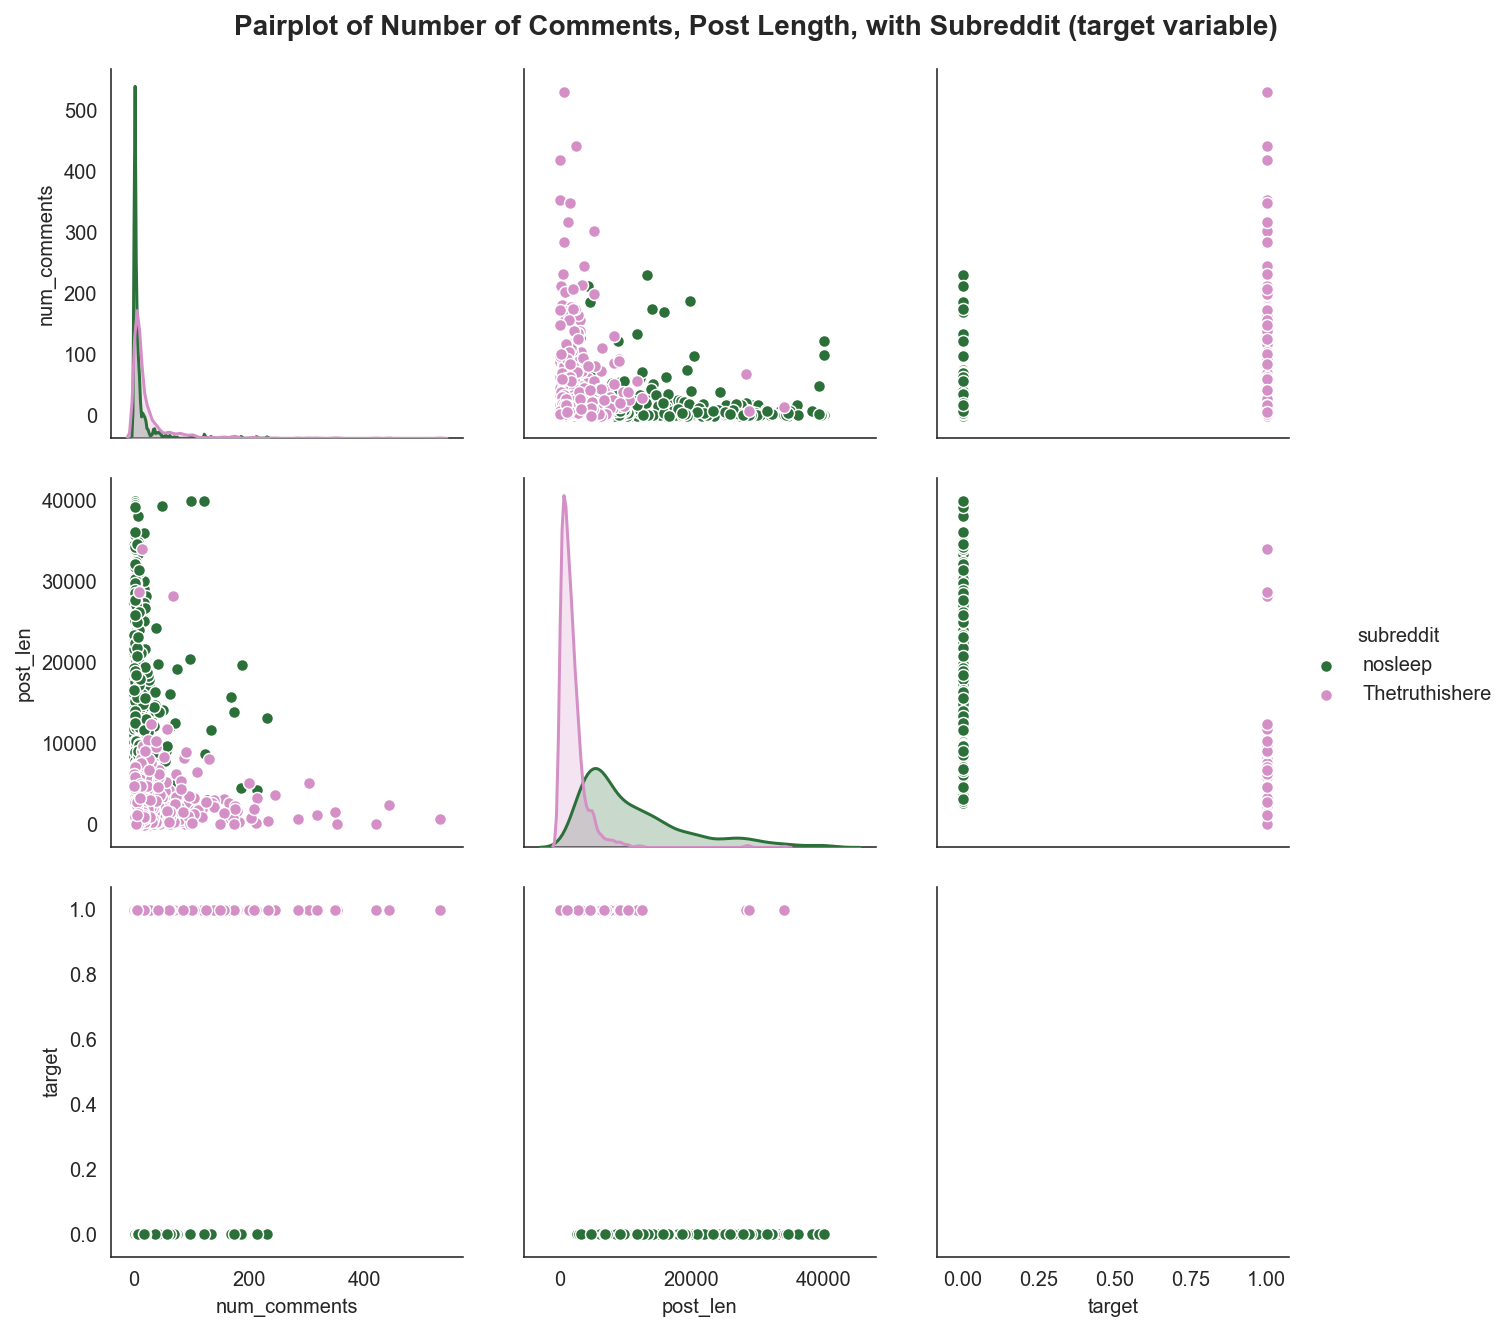

In [305]:
# plotting a pairplot for the above
np.seterr(divide='ignore', invalid='ignore') ## to hide warning messages
sns.set_style('white')
pairplot = sns.pairplot(combined, vars = ['num_comments','post_len','target'], hue="subreddit", height=3, palette = "cubehelix");
pairplot.fig.suptitle("Pairplot of Number of Comments, Post Length, with Subreddit (target variable)",
                          size = 14, y = 1.02, weight = 'bold') ;

#### Check most commonly used words per subreddit

In [140]:
# function to plot a word cloud of words occuring most in each subreddit
def plot_wordcloud(subreddit, title):
    wordcloud = WordCloud( collocations=False,background_color="white", max_words=150).generate(subreddit)

    plt.figure(figsize = (6, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.title(title, fontsize = 16, weight = 'bold', color = 'blue')
    plt.tight_layout() #pad = 0

In [141]:
# commonly used words per subreddit
nosleep = " ".join(review for review in combined[combined["target"]==0]['feature_var'])
truthishere = " ".join(review for review in combined[combined["target"]==1]['feature_var'])

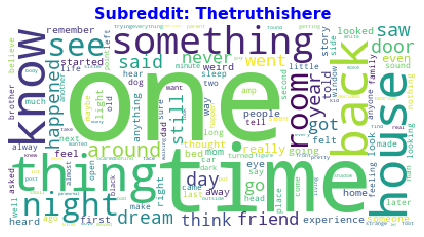

In [142]:
# for truthishere
plot_wordcloud(truthishere, "Subreddit: Thetruthishere")

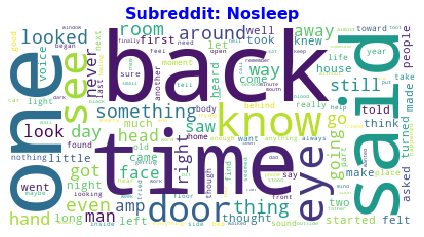

In [143]:
# for nosleep
plot_wordcloud(nosleep, "Subreddit: Nosleep")

## Feature Engineering

    1) Binarize the target column - Subreddit column
    2) Created new feature variable that combines title and body of every post to ease defining X and y later on

In [75]:
# binarize the target variable
combined['target'] = combined['subreddit'].map(lambda s:1 if s == 'Thetruthishere' else 0)

In [76]:
# check if the classes are balanced. 
combined.target.value_counts()

# baseline accuracy
combined.target.value_counts(normalize = True)

0    0.504782
1    0.495218
Name: target, dtype: float64

***Classes seems to be rather balanced.*** 

In [77]:
# combine heading and body to a single column called feature_var to easily define the independent variable X
combined['feature_var'] = combined.heading + " "+ combined.body

In [78]:
# ensure the new column created above is in the df
combined.tail()

,subreddit,selftext,author_fullname,title,name,author,num_comments,whitelist_status,body,heading,target,feature_var
993,Thetruthishere,I've been doing this since i can remember. Any...,t2_vgelj8w,I shake like i'm cold randomly .. and half the...,t3_dt1egu,Redthatcat,7,all_ads,since remember anyone got reason,shake like cold randomly half time bad follows,1,shake like cold randomly half time bad follows...
994,Thetruthishere,"I work at a home for youths, and one of the re...",t2_61zn4,"If some people are spiritually sensitive, are ...",t3_dsra2m,Kombaticus,18,all_ads,work home youth one resident classic paranorma...,people spiritually sensitive others anti sensi...,1,people spiritually sensitive others anti sensi...
995,Thetruthishere,They are hidden just now. They watch from the ...,t2_4m5n8q0p,Them,t3_dt2n7g,tnerrucetad2101,3,all_ads,hidden watch woodline yet come close losing,,1,hidden watch woodline yet come close losing
996,Thetruthishere,This happened a couple of years ago when I liv...,t2_14386b,Something ran down our hallway,t3_dsmmvk,rcard27,6,all_ads,happened couple year ago lived parent recently...,something ran hallway,1,something ran hallway happened couple year ago...
997,Thetruthishere,Been a long time lurker on this sub and many o...,t2_4o42cqqd,I saw the goatman when I was 9 years old,t3_d9kqnk,outpost-31-82,42,all_ads,long time lurker sub many paranormal supernatu...,saw goatman year old,1,saw goatman year old long time lurker sub many...


#### Save the cleaned and combined dfs into a .csv file for modelling later on. 

In [38]:
combined.to_csv('../data/combined.csv', index = False)